In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("./dataSet.csv" , low_memory=False)
df_ori = df.loc[:,["season","league",'name']]
df_use = df.drop(["Unnamed: 2","position1","position2"], axis=1)
df_use= df_use.replace(["-"],0)
df = df_use

In [2]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
for i in range(5,30):
    df.iloc[:,i] = pd.to_numeric(df.iloc[:,i], errors='coerce')

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17175 entries, 0 to 17174
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   season    17173 non-null  object 
 1   league    17173 non-null  object 
 2   name      17174 non-null  object 
 3   age       17173 non-null  float64
 4   Apps      17174 non-null  object 
 5   Mins      17173 non-null  float64
 6   Assists   17173 non-null  float64
 7   Rating    17173 non-null  float64
 8   Tackles   17173 non-null  float64
 9   Inter     17172 non-null  float64
 10  Fouls     17173 non-null  float64
 11  Offsides  17173 non-null  float64
 12  Clear     17173 non-null  float64
 13  Drb       17173 non-null  float64
 14  Blocks    17173 non-null  float64
 15  OwnG      17173 non-null  float64
 16  Goals     17173 non-null  float64
 17  SpG       17173 non-null  float64
 18  KeyP      17173 non-null  float64
 19  Drb.1     17173 non-null  float64
 20  Fouled    17173 non-null  fl

In [3]:
df.head()

,season,league,name,age,Apps,Mins,Assists,Rating,Tackles,Inter,...,Fouled,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
0,2019-2020,LaLiga,Lionel Messi Barcelona,34.0,32(1),2881.0,21.0,8.71,0.6,0.2,...,2.1,0.4,2.4,2.1,2.7,59.8,82.6,0.8,2.2,0.6
1,2019-2020,LaLiga,Guillermo Maripán Deportivo Alaves,27.0,1,90.0,0.0,7.54,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,12.0,75.0,0.0,1.0,0.0
2,2019-2020,LaLiga,Casemiro Real Madrid,29.0,35,3091.0,3.0,7.47,2.7,1.9,...,1.9,0.1,0.8,0.7,0.4,61.5,84.1,0.2,6.5,0.0
3,2019-2020,LaLiga,Karim Benzema Real Madrid,33.0,36(1),3155.0,8.0,7.44,0.5,0.2,...,0.4,0.7,1.1,1.7,1.6,34.7,86.2,0.0,1.4,0.1
4,2019-2020,LaLiga,Luis Suárez Barcelona,34.0,22(6),2002.0,8.0,7.33,0.1,0.0,...,0.9,0.6,0.9,1.2,0.9,23.4,75.5,0.1,0.9,0.0


In [4]:
from sklearn.preprocessing import StandardScaler

df_sub = df.iloc[:,[0,1,2,4]]
df = df.drop(["season","league","name","Apps"], axis=1)

standard_scaler = StandardScaler()
df_scaled = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)

In [5]:
df_scaled

,age,Mins,Assists,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb,...,Fouled,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
0,1.485154,1.693775,15.529425,2.053423,-0.452232,-0.722357,-0.365150,-0.481438,-0.865114,-0.093565,...,2.480171,-0.184628,5.410684,2.207014,-0.141485,2.169697,0.539168,1.282160,0.237920,3.970020
1,0.018472,-1.104695,-0.790479,1.039346,0.070620,2.100655,-1.426215,3.935562,6.004354,0.962285,...,-1.025218,-0.858116,-0.636725,-1.053759,-0.150677,-0.789928,0.147733,-0.620377,-0.372341,-0.226530
2,0.437524,1.904337,1.540936,0.978674,2.292742,1.943821,2.994889,-0.039738,0.585107,2.440474,...,2.146325,-0.689744,1.379078,0.033165,-0.149315,2.274956,0.616425,-0.144743,2.424686,-0.226530
3,1.275628,1.968508,5.426627,0.952672,-0.582945,-0.722357,-0.365150,-0.481438,-0.254494,-0.304735,...,-0.357525,0.320488,2.135004,1.585914,-0.145230,0.615585,0.724585,-0.620377,-0.168921,0.472895
4,1.485154,0.812422,5.426627,0.857332,-1.105798,-1.036025,-0.541994,-0.481438,-0.559804,-0.304735,...,0.477092,0.152116,1.631054,0.809540,-0.147613,-0.084076,0.173485,-0.382560,-0.423196,-0.226530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17170,-0.610106,-1.104695,-0.790479,-0.546776,0.070620,-1.036025,2.110668,8.352563,-0.101840,0.962285,...,-1.025218,0.825604,-0.636725,-1.053759,-0.150677,1.562912,-0.109791,-0.620377,0.136210,-0.226530
17171,1.485154,-1.104695,-0.013341,-0.685453,-1.236511,0.532315,-1.426215,-0.481438,1.424709,0.962285,...,-1.025218,-0.858116,-0.636725,-1.053759,-0.150677,1.500995,0.487664,-0.620377,0.136210,-0.226530
17172,-0.191054,-1.104695,-0.790479,-0.850132,-1.236511,-1.036025,-1.426215,-0.481438,-0.101840,-1.149415,...,-1.025218,-0.858116,-0.636725,-1.053759,-0.150677,-0.418427,-0.279756,-0.620377,1.661861,-0.226530
17173,-0.191054,-1.107703,0.763798,-0.910803,0.070620,0.532315,2.110668,-0.481438,-0.865114,-1.149415,...,0.644015,2.509325,1.883029,-1.053759,-0.147272,0.324575,0.405256,-0.620377,0.136210,-0.226530


In [6]:
df_check = pd.concat([df_sub, df_scaled], axis = 1)
df_check

,season,league,name,Apps,age,Mins,Assists,Rating,Tackles,Inter,...,Fouled,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
0,2019-2020,LaLiga,Lionel Messi Barcelona,32(1),1.485154,1.693775,15.529425,2.053423,-0.452232,-0.722357,...,2.480171,-0.184628,5.410684,2.207014,-0.141485,2.169697,0.539168,1.282160,0.237920,3.970020
1,2019-2020,LaLiga,Guillermo Maripán Deportivo Alaves,1,0.018472,-1.104695,-0.790479,1.039346,0.070620,2.100655,...,-1.025218,-0.858116,-0.636725,-1.053759,-0.150677,-0.789928,0.147733,-0.620377,-0.372341,-0.226530
2,2019-2020,LaLiga,Casemiro Real Madrid,35,0.437524,1.904337,1.540936,0.978674,2.292742,1.943821,...,2.146325,-0.689744,1.379078,0.033165,-0.149315,2.274956,0.616425,-0.144743,2.424686,-0.226530
3,2019-2020,LaLiga,Karim Benzema Real Madrid,36(1),1.275628,1.968508,5.426627,0.952672,-0.582945,-0.722357,...,-0.357525,0.320488,2.135004,1.585914,-0.145230,0.615585,0.724585,-0.620377,-0.168921,0.472895
4,2019-2020,LaLiga,Luis Suárez Barcelona,22(6),1.485154,0.812422,5.426627,0.857332,-1.105798,-1.036025,...,0.477092,0.152116,1.631054,0.809540,-0.147613,-0.084076,0.173485,-0.382560,-0.423196,-0.226530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17170,2020-2021,USA,Eddie Segura Los Angeles FC,1,-0.610106,-1.104695,-0.790479,-0.546776,0.070620,-1.036025,...,-1.025218,0.825604,-0.636725,-1.053759,-0.150677,1.562912,-0.109791,-0.620377,0.136210,-0.226530
17171,2020-2021,USA,AJ Delagarza JR Inter Miami CF,1,1.485154,-1.104695,-0.013341,-0.685453,-1.236511,0.532315,...,-1.025218,-0.858116,-0.636725,-1.053759,-0.150677,1.500995,0.487664,-0.620377,0.136210,-0.226530
17172,2020-2021,USA,Pablo Sisniega Los Angeles FC,1,-0.191054,-1.104695,-0.790479,-0.850132,-1.236511,-1.036025,...,-1.025218,-0.858116,-0.636725,-1.053759,-0.150677,-0.418427,-0.279756,-0.620377,1.661861,-0.226530
17173,2020-2021,USA,Ruan Orlando City,1,-0.191054,-1.107703,0.763798,-0.910803,0.070620,0.532315,...,0.644015,2.509325,1.883029,-1.053759,-0.147272,0.324575,0.405256,-0.620377,0.136210,-0.226530


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set_palette("hls")
plt.rcParams["figure.figsize"] = (15, 9)
df_scaled.dropna()

#데이터의 대략적인 분포 및 해석을 위한 시각화 - 데이터 설명시 사용
#sns.distplot(df["Goals"], rug=False, hist=False, kde=True)
#plt.show()

,age,Mins,Assists,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb,...,Fouled,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
0,1.485154,1.693775,15.529425,2.053423,-0.452232,-0.722357,-0.365150,-0.481438,-0.865114,-0.093565,...,2.480171,-0.184628,5.410684,2.207014,-0.141485,2.169697,0.539168,1.282160,0.237920,3.970020
1,0.018472,-1.104695,-0.790479,1.039346,0.070620,2.100655,-1.426215,3.935562,6.004354,0.962285,...,-1.025218,-0.858116,-0.636725,-1.053759,-0.150677,-0.789928,0.147733,-0.620377,-0.372341,-0.226530
2,0.437524,1.904337,1.540936,0.978674,2.292742,1.943821,2.994889,-0.039738,0.585107,2.440474,...,2.146325,-0.689744,1.379078,0.033165,-0.149315,2.274956,0.616425,-0.144743,2.424686,-0.226530
3,1.275628,1.968508,5.426627,0.952672,-0.582945,-0.722357,-0.365150,-0.481438,-0.254494,-0.304735,...,-0.357525,0.320488,2.135004,1.585914,-0.145230,0.615585,0.724585,-0.620377,-0.168921,0.472895
4,1.485154,0.812422,5.426627,0.857332,-1.105798,-1.036025,-0.541994,-0.481438,-0.559804,-0.304735,...,0.477092,0.152116,1.631054,0.809540,-0.147613,-0.084076,0.173485,-0.382560,-0.423196,-0.226530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17170,-0.610106,-1.104695,-0.790479,-0.546776,0.070620,-1.036025,2.110668,8.352563,-0.101840,0.962285,...,-1.025218,0.825604,-0.636725,-1.053759,-0.150677,1.562912,-0.109791,-0.620377,0.136210,-0.226530
17171,1.485154,-1.104695,-0.013341,-0.685453,-1.236511,0.532315,-1.426215,-0.481438,1.424709,0.962285,...,-1.025218,-0.858116,-0.636725,-1.053759,-0.150677,1.500995,0.487664,-0.620377,0.136210,-0.226530
17172,-0.191054,-1.104695,-0.790479,-0.850132,-1.236511,-1.036025,-1.426215,-0.481438,-0.101840,-1.149415,...,-1.025218,-0.858116,-0.636725,-1.053759,-0.150677,-0.418427,-0.279756,-0.620377,1.661861,-0.226530
17173,-0.191054,-1.107703,0.763798,-0.910803,0.070620,0.532315,2.110668,-0.481438,-0.865114,-1.149415,...,0.644015,2.509325,1.883029,-1.053759,-0.147272,0.324575,0.405256,-0.620377,0.136210,-0.226530


In [8]:
df_scaled[np.isnan(df_scaled) == True] = 0

In [9]:
df_scaled

,age,Mins,Assists,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb,...,Fouled,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
0,1.485154,1.693775,15.529425,2.053423,-0.452232,-0.722357,-0.365150,-0.481438,-0.865114,-0.093565,...,2.480171,-0.184628,5.410684,2.207014,-0.141485,2.169697,0.539168,1.282160,0.237920,3.970020
1,0.018472,-1.104695,-0.790479,1.039346,0.070620,2.100655,-1.426215,3.935562,6.004354,0.962285,...,-1.025218,-0.858116,-0.636725,-1.053759,-0.150677,-0.789928,0.147733,-0.620377,-0.372341,-0.226530
2,0.437524,1.904337,1.540936,0.978674,2.292742,1.943821,2.994889,-0.039738,0.585107,2.440474,...,2.146325,-0.689744,1.379078,0.033165,-0.149315,2.274956,0.616425,-0.144743,2.424686,-0.226530
3,1.275628,1.968508,5.426627,0.952672,-0.582945,-0.722357,-0.365150,-0.481438,-0.254494,-0.304735,...,-0.357525,0.320488,2.135004,1.585914,-0.145230,0.615585,0.724585,-0.620377,-0.168921,0.472895
4,1.485154,0.812422,5.426627,0.857332,-1.105798,-1.036025,-0.541994,-0.481438,-0.559804,-0.304735,...,0.477092,0.152116,1.631054,0.809540,-0.147613,-0.084076,0.173485,-0.382560,-0.423196,-0.226530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17170,-0.610106,-1.104695,-0.790479,-0.546776,0.070620,-1.036025,2.110668,8.352563,-0.101840,0.962285,...,-1.025218,0.825604,-0.636725,-1.053759,-0.150677,1.562912,-0.109791,-0.620377,0.136210,-0.226530
17171,1.485154,-1.104695,-0.013341,-0.685453,-1.236511,0.532315,-1.426215,-0.481438,1.424709,0.962285,...,-1.025218,-0.858116,-0.636725,-1.053759,-0.150677,1.500995,0.487664,-0.620377,0.136210,-0.226530
17172,-0.191054,-1.104695,-0.790479,-0.850132,-1.236511,-1.036025,-1.426215,-0.481438,-0.101840,-1.149415,...,-1.025218,-0.858116,-0.636725,-1.053759,-0.150677,-0.418427,-0.279756,-0.620377,1.661861,-0.226530
17173,-0.191054,-1.107703,0.763798,-0.910803,0.070620,0.532315,2.110668,-0.481438,-0.865114,-1.149415,...,0.644015,2.509325,1.883029,-1.053759,-0.147272,0.324575,0.405256,-0.620377,0.136210,-0.226530


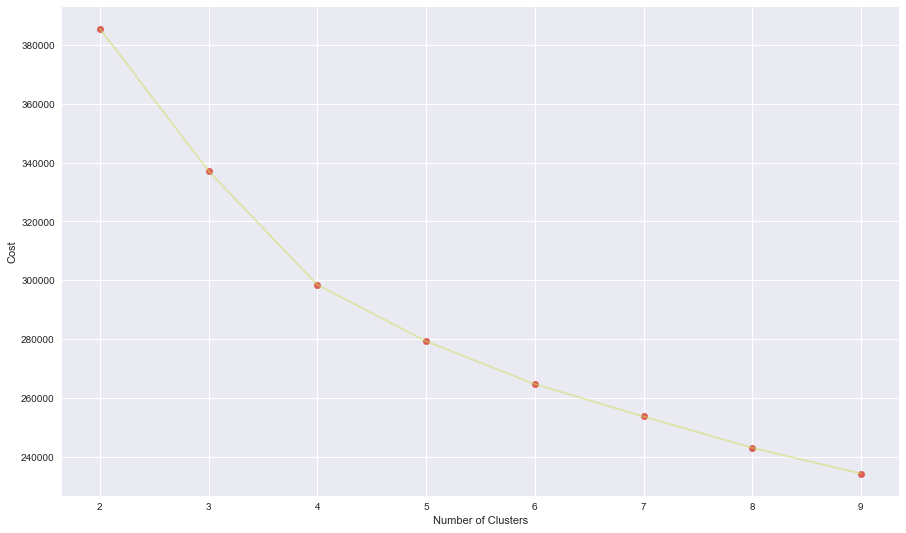

In [10]:
from sklearn.cluster import KMeans

#Find elbow point

def change_n_clusters(n_clusters, data):
    sum_of_squared_distance = []
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters=n_cluster)
        kmeans.fit(df_scaled)
        sum_of_squared_distance.append(kmeans.inertia_)
        
    plt.plot(n_clusters , sum_of_squared_distance , 'o')
    plt.plot(n_clusters , sum_of_squared_distance , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Cost')
    
n_clusters = [2,3,4,5,6,7,8,9]
change_n_clusters(n_clusters, df_scaled)


In [11]:
#모델에 대한 결과 확인 예시 코드

kmeans = KMeans(n_clusters=140)
kmeans.fit(df_scaled)

result_by_sklearn = df_scaled.copy()
result_by_sklearn["cluster"] = kmeans.labels_
result_by_sklearn.head()

,age,Mins,Assists,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb,...,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB,cluster
0,1.485154,1.693775,15.529425,2.053423,-0.452232,-0.722357,-0.365150,-0.481438,-0.865114,-0.093565,...,-0.184628,5.410684,2.207014,-0.141485,2.169697,0.539168,1.282160,0.237920,3.970020,14
1,0.018472,-1.104695,-0.790479,1.039346,0.070620,2.100655,-1.426215,3.935562,6.004354,0.962285,...,-0.858116,-0.636725,-1.053759,-0.150677,-0.789928,0.147733,-0.620377,-0.372341,-0.226530,52
2,0.437524,1.904337,1.540936,0.978674,2.292742,1.943821,2.994889,-0.039738,0.585107,2.440474,...,-0.689744,1.379078,0.033165,-0.149315,2.274956,0.616425,-0.144743,2.424686,-0.226530,24
3,1.275628,1.968508,5.426627,0.952672,-0.582945,-0.722357,-0.365150,-0.481438,-0.254494,-0.304735,...,0.320488,2.135004,1.585914,-0.145230,0.615585,0.724585,-0.620377,-0.168921,0.472895,106
4,1.485154,0.812422,5.426627,0.857332,-1.105798,-1.036025,-0.541994,-0.481438,-0.559804,-0.304735,...,0.152116,1.631054,0.809540,-0.147613,-0.084076,0.173485,-0.382560,-0.423196,-0.226530,106


In [19]:
#해당 클러스터에 속하는 선수들 전체 확인

df_c = result_by_sklearn[['cluster']]

df_cluster = pd.concat([df_ori, df_c], axis = 1)
#df_cluster

find_player = input("살펴보고 싶은 비슷한 선수들의 기준 선수 이름 입력 : ")
idx = df_cluster.index[df_cluster['name'] == find_player]
cluster_idx = []
for i in idx:
    cluster_idx.append(int(df_cluster.loc[i,["cluster"]].values))
print(cluster_idx)

#예시 : Lionel Messi Barcelona (복사해서 확인) / Nuno Tavares Benfica

#판다스 열 전체 보기 None 대신 10으로 두기
pd.set_option('display.max_rows', None)


p = 0
for i in cluster_idx:
    print("---------------------------------------------------------------------------------")
    print("기준 선수")
    print("")
    print(df_cluster.loc[idx[p],:])
    print("---------------------------------------------------------------------------------")
    print(df_cluster.loc[(df_cluster['cluster'] == i)])
    print("---------------------------------------------------------------------------------")
    p += 1
    
#각 k-mean의 k에 대해서 실루엣 계수 살펴보기

살펴보고 싶은 비슷한 선수들의 기준 선수 이름 입력 : Nuno Tavares Benfica
[49]
---------------------------------------------------------------------------------
기준 선수

season                2019-2020
league                  LigaNOS
name       Nuno Tavares Benfica
cluster                      49
Name: 12212, dtype: object
---------------------------------------------------------------------------------
          season           league                                     name  \
6055   2019-2020          SericeA                  Aleksandar Kolarov Roma   
6077   2019-2020          SericeA                     Miguel Veloso Verona   
6086   2019-2020          SericeA                     Marco Faraoni Verona   
6141   2019-2020          SericeA                         Mário Rui Napoli   
6156   2019-2020          SericeA                         Ken Sema Udinese   
6170   2019-2020          SericeA                  Cristian Ansaldi Torino   
6171   2019-2020          SericeA                       Lasse Schöne Ge